In [68]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHASHANK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHASHANK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
pip install vaderSentiment

In [70]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

import math 

from sklearn import metrics 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [71]:
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()

In [72]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#from google.colab import files
#uploaded = files.upload()

In [73]:
#from google.colab import drive
import io
Col_names =['ID','Clothing_ID','Age','Title','Review','Rating','Recommended','Positive_count','Division_Name','Department_Name','Class_Name']
#df = pd.read_csv(io.BytesIO(uploaded['Womens Clothing E-Commerce Reviews.csv']),header = None, skiprows=1, names = Col_names)
#path = '/content/gdrive/My Drive/Colab Notebooks/Womens Clothing E-Commerce Reviews.csv'
#df = pd.read_csv(path,header = None, skiprows=1, names = Col_names)

df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', header = None, skiprows =1, names = Col_names)
df

,ID,Clothing_ID,Age,Title,Review,Rating,Recommended,Positive_count,Division_Name,Department_Name,Class_Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               23486 non-null  int64 
 1   Clothing_ID      23486 non-null  int64 
 2   Age              23486 non-null  int64 
 3   Title            19676 non-null  object
 4   Review           22641 non-null  object
 5   Rating           23486 non-null  int64 
 6   Recommended      23486 non-null  int64 
 7   Positive_count   23486 non-null  int64 
 8   Division_Name    23472 non-null  object
 9   Department_Name  23472 non-null  object
 10  Class_Name       23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [75]:
df.isnull().sum()

ID                    0
Clothing_ID           0
Age                   0
Title              3810
Review              845
Rating                0
Recommended           0
Positive_count        0
Division_Name        14
Department_Name      14
Class_Name           14
dtype: int64

In [76]:
df.describe()

,ID,Clothing_ID,Age,Rating,Recommended,Positive_count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [77]:
df=df.dropna(subset=["Review"]).reset_index(drop=True) # removing null review

In [78]:
df.drop(labels =['ID','Clothing_ID'],axis = 1,inplace = True)

In [79]:
df.shape

(22641, 9)

In [80]:
df

,Age,Title,Review,Rating,Recommended,Positive_count,Division_Name,Department_Name,Class_Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
22636,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
22637,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
22638,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
22639,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


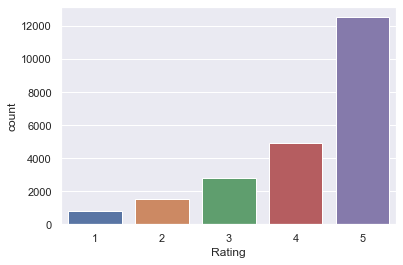

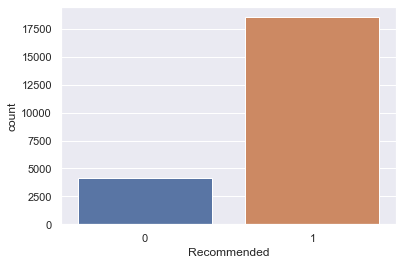

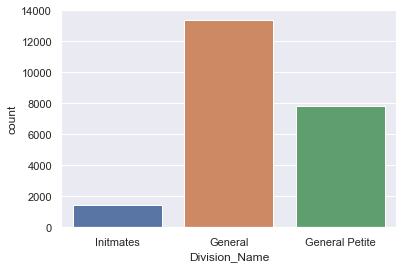

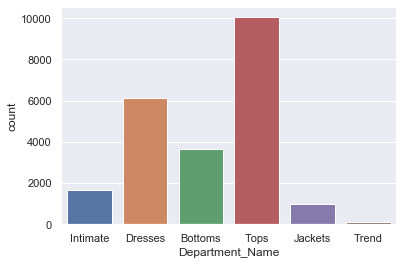

In [81]:
col=['Rating','Recommended','Division_Name','Department_Name']
for i in col:
    sns.countplot(x=i,data=df)
    plt.show()

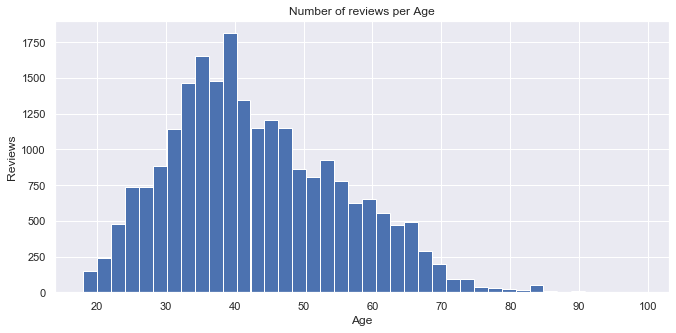

In [82]:
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(df.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age');

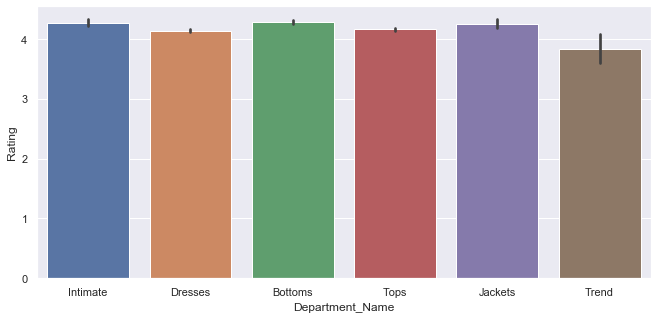

In [83]:
sns.barplot(df.Department_Name,df.Rating)

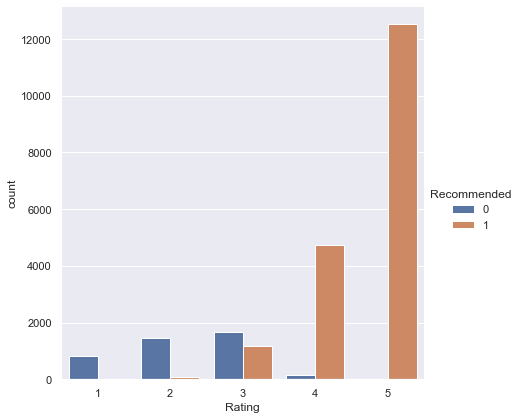

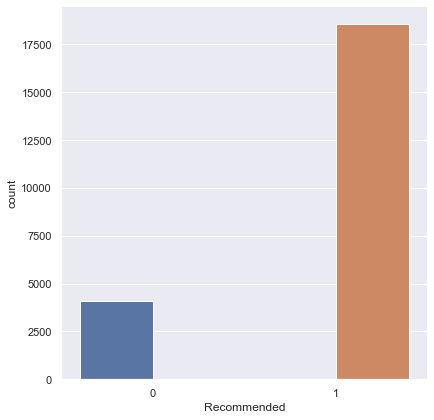

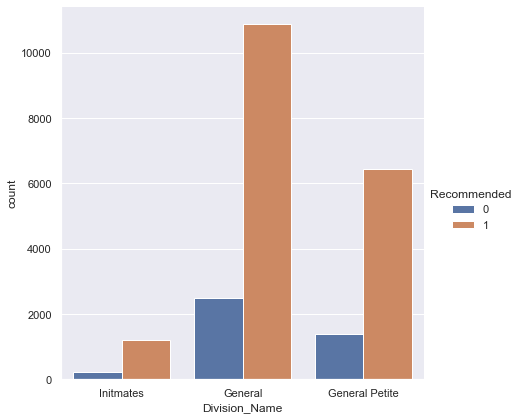

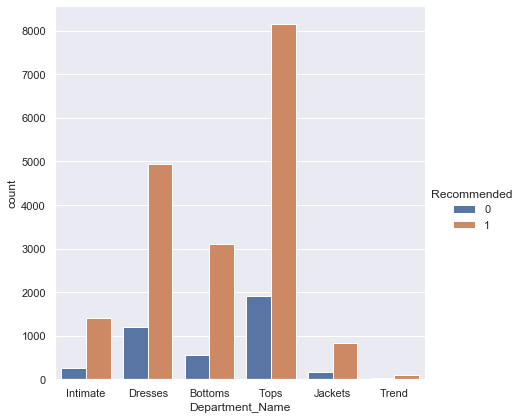

In [84]:
for i in col:
    sns.catplot(x=i,data=df,kind='count',hue='Recommended',height=6)
    plt.show()

In [85]:
print(df.groupby(df.Recommended).size())

Recommended
0     4101
1    18540
dtype: int64


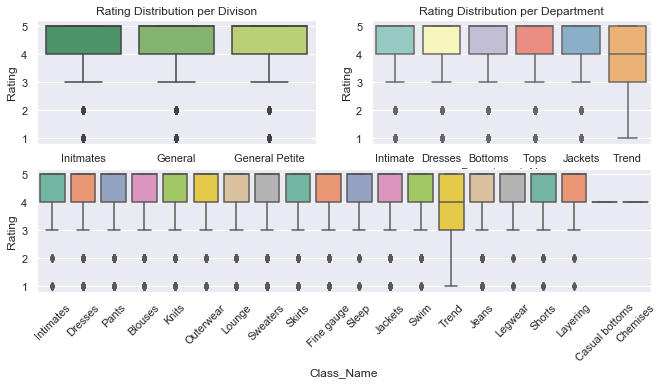

In [86]:
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.boxplot(x="Division_Name", y="Rating", data=df,palette='summer')
ax1 = plt.title('Rating Distribution per Divison')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.boxplot(x="Department_Name", y="Rating", data=df,palette='Set3')
ax2 = plt.title('Rating Distribution per Department')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.boxplot(x="Class_Name", y="Rating", data=df,palette='Set2')
#ax3 = plt.title('Rating Distribution per Class')

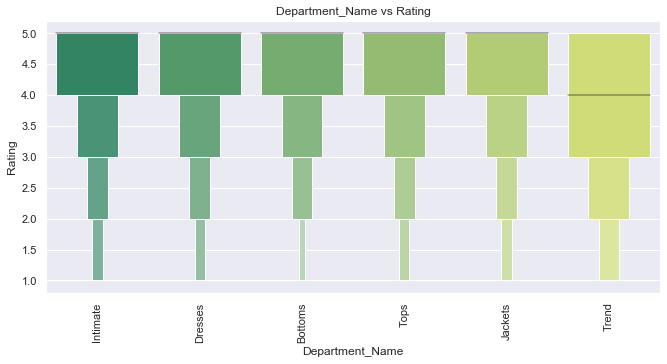

In [87]:
color=plt.cm.ocean(np.linspace(0,1,20))
sns.boxenplot(df['Department_Name'],df['Rating'],palette='summer')
plt.title('Department_Name vs Rating')
plt.xticks(rotation=90)
plt.show()

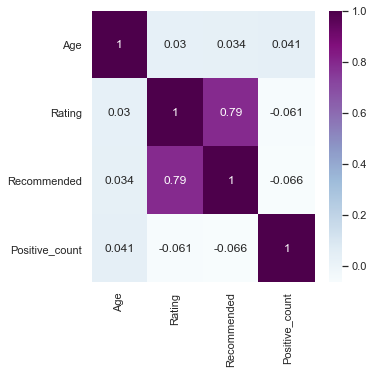

In [88]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
#Rating and Recommended are highly corelated 

In [89]:
df.Review

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
22636    I was very happy to snag this dress at such a ...
22637    It reminds me of maternity clothes. soft, stre...
22638    This fit well, but the top was very see throug...
22639    I bought this dress for a wedding i have this ...
22640    This dress in a lovely platinum is feminine an...
Name: Review, Length: 22641, dtype: object

In [90]:
review = [x for x in df.Review]
allwords =[]
pos = []
import re
import nltk
nltk.download('averaged_perceptron_tagger')
for x in review:
  word = nltk.word_tokenize(x)
  pos+= nltk.pos_tag(word)
  allwords+=word



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SHASHANK\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [91]:
print(allwords[:50])
print("\n")
print(pos[:50])

['Absolutely', 'wonderful', '-', 'silky', 'and', 'sexy', 'and', 'comfortable', 'Love', 'this', 'dress', '!', 'it', "'s", 'sooo', 'pretty', '.', 'i', 'happened', 'to', 'find', 'it', 'in', 'a', 'store', ',', 'and', 'i', "'m", 'glad', 'i', 'did', 'bc', 'i', 'never', 'would', 'have', 'ordered', 'it', 'online', 'bc', 'it', "'s", 'petite', '.', 'i', 'bought', 'a', 'petite', 'and']


[('Absolutely', 'RB'), ('wonderful', 'JJ'), ('-', ':'), ('silky', 'NN'), ('and', 'CC'), ('sexy', 'NN'), ('and', 'CC'), ('comfortable', 'JJ'), ('Love', 'VB'), ('this', 'DT'), ('dress', 'NN'), ('!', '.'), ('it', 'PRP'), ("'s", 'VBZ'), ('sooo', 'JJ'), ('pretty', 'RB'), ('.', '.'), ('i', 'NN'), ('happened', 'VBD'), ('to', 'TO'), ('find', 'VB'), ('it', 'PRP'), ('in', 'IN'), ('a', 'DT'), ('store', 'NN'), (',', ','), ('and', 'CC'), ('i', 'JJ'), ("'m", 'VBP'), ('glad', 'JJ'), ('i', 'NN'), ('did', 'VBD'), ('bc', 'NN'), ('i', 'NN'), ('never', 'RB'), ('would', 'MD'), ('have', 'VB'), ('ordered', 'VBN'), ('it', 'PRP'), ('onli

In [92]:
nltk.download('wordnet')
import string
stop = nltk.corpus.stopwords.words('english')
stop=set(stop)
stop.update(['dress','also','one','would','skirt', 'blouse','sweater', 'shirt','bottom',
             'pant', 'pants' 'jean', 'jeans','jacket','top', 'dresse'])
allwords = [i.lower() for i in allwords if i.lower() not in stop and i.lower() not in string.punctuation and i.lower().isalpha()]
stemmer = nltk.stem.WordNetLemmatizer()
allwords =[ stemmer.lemmatize(word) for word in allwords]
freq = nltk.FreqDist(allwords)
plotwords = freq.most_common(10)
print(freq.most_common(10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHASHANK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('fit', 10122), ('size', 9360), ('love', 8979), ('like', 7032), ('color', 6908), ('look', 6885), ('wear', 6519), ('great', 6094), ('fabric', 4860), ('small', 4583)]


[(('great', 'JJ'), 5768), (('small', 'JJ'), 4559), (('little', 'JJ'), 3538), (('soft', 'JJ'), 3252), (('perfect', 'JJ'), 3063), (('comfortable', 'JJ'), 2977), (('nice', 'JJ'), 2849), (('large', 'JJ'), 2779), (('beautiful', 'JJ'), 2596), (('cute', 'JJ'), 1978)]


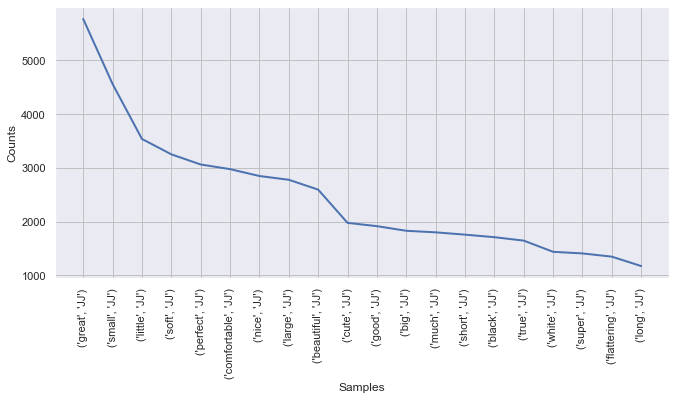

In [93]:
allJJ = [x for x in pos if x[1] == 'JJ' and  x[0].lower() not in stop and x[0].lower() not in string.punctuation and x[0].lower().isalpha()]
allJJwords =[x[0] for x in allJJ] 
freq1 = nltk.FreqDist(allJJ)
print(freq1.most_common(10))
freq1.plot(20,cumulative=False)

In [94]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as npy
import matplotlib.pyplot as plt




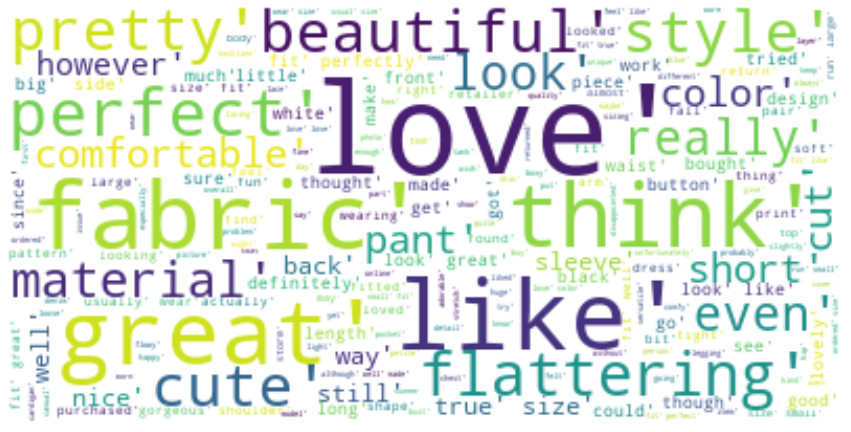

In [95]:
wc = WordCloud(background_color = 'white', max_font_size = 60, max_words =200,contour_width=3, contour_color='firebrick')
wc.generate(str(allwords))
plt.figure(figsize =[15,10])
plt.imshow(wc,interpolation ='bilinear')
plt.axis('off')
plt.show()
wc.to_file("wordCloud.png")

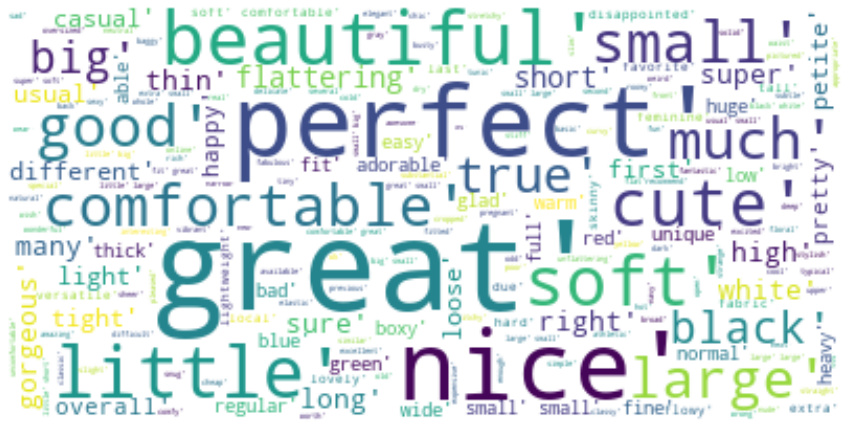

In [96]:
wc.generate(str(allJJwords))
 
plt.figure(figsize =[15,10])
plt.imshow(wc,interpolation ='bilinear')
plt.axis('off')
plt.show()
wc.to_file("wordCloud1.png")

In [97]:
df['clas'] = np.NaN

In [98]:
for i in range(len(df['Rating'])):
  if df['Rating'][i] > 3:
    df['clas'][i] = 'pos'
  elif df['Rating'][i] < 3:
    df['clas'][i] = 'neg'
  else :
    if df['Recommended'][i] == 1:
      df['clas'][i] = 'pos'
    else:
      df['clas'][i] = 'neg'

C:\Users\SHASHANK\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SHASHANK\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SHASHANK\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SHASHANK\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithC

In [99]:
df

,Age,Title,Review,Rating,Recommended,Positive_count,Division_Name,Department_Name,Class_Name,clas
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,pos
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,pos
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,neg
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,pos
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,pos
...,...,...,...,...,...,...,...,...,...,...
22636,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,pos
22637,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,pos
22638,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,neg
22639,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,pos


In [100]:
#step 1 , creating Object set
tup = []
for i in range(len(df['Rating'])):
  tup+= [(nltk.word_tokenize(df['Review'][i]),df['clas'][i])]
print(tup[:2])  

[(['Absolutely', 'wonderful', '-', 'silky', 'and', 'sexy', 'and', 'comfortable'], 'pos'), (['Love', 'this', 'dress', '!', 'it', "'s", 'sooo', 'pretty', '.', 'i', 'happened', 'to', 'find', 'it', 'in', 'a', 'store', ',', 'and', 'i', "'m", 'glad', 'i', 'did', 'bc', 'i', 'never', 'would', 'have', 'ordered', 'it', 'online', 'bc', 'it', "'s", 'petite', '.', 'i', 'bought', 'a', 'petite', 'and', 'am', '5', "'", '8', "''", '.', 'i', 'love', 'the', 'length', 'on', 'me-', 'hits', 'just', 'a', 'little', 'below', 'the', 'knee', '.', 'would', 'definitely', 'be', 'a', 'true', 'midi', 'on', 'someone', 'who', 'is', 'truly', 'petite', '.'], 'pos')]


In [101]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = 'colab'

In [102]:
from textblob import TextBlob
import sys
df['Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [103]:
import plotly
from plotly.graph_objs import Scatter, Layout
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

df['Polarity']

0        0.633333
1        0.339583
2        0.073675
3        0.550000
4        0.512891
           ...   
22636    0.552667
22637    0.091667
22638    0.414286
22639    0.322222
22640    0.413889
Name: Polarity, Length: 22641, dtype: float64

In [104]:
df['Polarity'].iplot(
kind='hist',
    bins=50,
    xTitle='Polarity',
    linecolor='green',
    yTitle='Count',
    title='Sentiment Polarity Distribution')
